# Author:Mehenaz Taherin
### Data Science & Business Analytics Intern
### GRIP - The Sparks Foundation

**Task 04:Exploratory Data Analysis - Terrorism**


**Task Objective**

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
● As a security/defense analyst, try to find out the hot zone of terrorism.
● What all security issues and insights you can derive by EDA? 

### Load the libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### read the file

In [2]:
df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1' ) #Encoding to use for UTF when reading/writing
df.head(n=10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
df.shape

(181691, 135)

### From the column name i found that some of the columns wont add  any significient value in further analysis.Thats why I decided to work with less data

In [6]:
df1=df[['iyear', 'imonth', 'iday',  'extended', 
        'country_txt', 'region_txt','provstate', 'city',  
        'success', 'suicide',  
        'attacktype1_txt', 
        'targtype1_txt','target1','targsubtype1_txt','natlty1_txt', 
        'gname','motive','weaptype1_txt', 
        'nkill', 'nwound','ransom']]

In [7]:
df1.shape

(181691, 21)

### Certain variable names have been modified for convenience during writing the code for analysis.

In [8]:
df1.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                    'provstate':'state','attacktype1_txt':'AttackType','target1':'Target','natlty1_txt':'Nationality',
                    'nkill':'Killed','nwound':'Wounded',
                    'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
df1.columns.values

array(['Year', 'Month', 'Day', 'extended', 'Country', 'Region', 'state',
       'city', 'success', 'suicide', 'AttackType', 'Target_type',
       'Target', 'targsubtype1_txt', 'Nationality', 'Group', 'Motive',
       'Weapon_type', 'Killed', 'Wounded', 'ransom'], dtype=object)

### Data preparation:

In [9]:
display(df1.isnull().sum().sort_values(ascending=False))

Motive              131130
ransom              104310
Wounded              16311
targsubtype1_txt     10373
Killed               10313
Nationality           1559
Target                 636
city                   434
state                  421
Month                    0
Day                      0
extended                 0
Country                  0
Region                   0
AttackType               0
success                  0
suicide                  0
Target_type              0
Group                    0
Weapon_type              0
Year                     0
dtype: int64

In [10]:
#..................missing values percent..............
def missing_values_(terror): 
    missing_value = df1.isnull().sum()
    missing_value_percent = 100 * df1.isnull().sum()/len(terror)
    missing_values_ = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_values_last = missing_values_.rename(
    columns = {0 : 'Missing Values', 1 : '% '})
    return missing_values_last
missing_values_(df1)

,Missing Values,%
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
extended,0,0.000000
Country,0,0.000000
Region,0,0.000000
state,421,0.231712
city,434,0.238867
success,0,0.000000
suicide,0,0.000000


<AxesSubplot:>

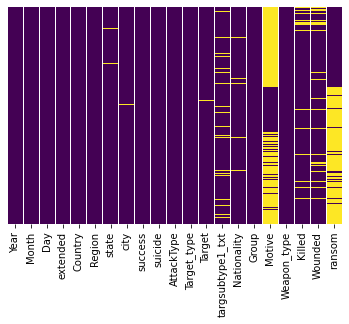

In [7]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### I did not want to drop any value. So I replaced them with a value that has the similar type.

In [11]:
df1['Motive'].fillna(value='unknown', inplace=True) 
df1['ransom'].fillna(value='Unknown', inplace=True)
df1["Wounded"].fillna(df1["Wounded"].mean(), inplace=True)
df1['city'].fillna(value='Unknown', inplace=True)
df1['Target'].fillna(value='Unknown', inplace=True)
df1["Killed"].fillna(df1["Killed"].mean(), inplace=True)
df1["Nationality"].fillna(value="Unknown",inplace=True)
df1["state"].fillna(value="unknown",inplace=True)
df1["targsubtype1_txt"].fillna(value="unknown",inplace=True)

<AxesSubplot:>

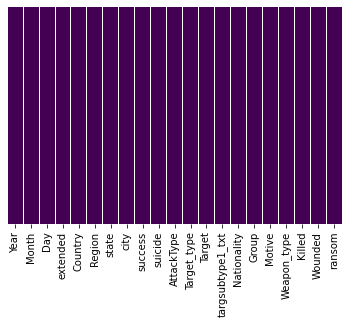

In [12]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              181691 non-null  int64  
 1   Month             181691 non-null  int64  
 2   Day               181691 non-null  int64  
 3   extended          181691 non-null  int64  
 4   Country           181691 non-null  object 
 5   Region            181691 non-null  object 
 6   state             181691 non-null  object 
 7   city              181691 non-null  object 
 8   success           181691 non-null  int64  
 9   suicide           181691 non-null  int64  
 10  AttackType        181691 non-null  object 
 11  Target_type       181691 non-null  object 
 12  Target            181691 non-null  object 
 13  targsubtype1_txt  181691 non-null  object 
 14  Nationality       181691 non-null  object 
 15  Group             181691 non-null  object 
 16  Motive            18

### ckeck for duplicate:

In [14]:

if len(df[df.duplicated()])>0:
    print("No of duplicated entries:",len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("no duplicated values are found")

no duplicated values are found


### count values per column:

In [31]:
for i in df1.columns:
    x=df1[i].nunique()
    print(i,x)

Year 47
Month 13
Day 32
extended 2
Country 205
Region 12
state 2855
city 36674
success 2
suicide 2
AttackType 9
Target_type 22
Target 86006
targsubtype1_txt 113
Nationality 216
Group 3537
Motive 14491
Weapon_type 12
Killed 206
Wounded 239
ransom 4


### Explore data:

In [56]:
df1["Country"].value_counts().idxmax()

'Iraq'

Country 'Iraq' has the most terrorist attacks.

In [57]:
df1["Region"].value_counts().idxmax()

'Middle East & North Africa'

Middle East & North Africa Region has the most attacks

In [59]:
df1["city"].value_counts().index[1]

'Baghdad'

Baghdad city has the maximum number of attack

In [63]:
df1["Group"].value_counts().index[1]

'Taliban'

'Taliban' a Terrorist group 

In [64]:
df1["Nationality"].value_counts().idxmax()

'Iraq'

In [67]:
df1["AttackType"].value_counts().idxmax()

'Bombing/Explosion'

In [68]:
df1["Year"].value_counts().idxmax()

2014

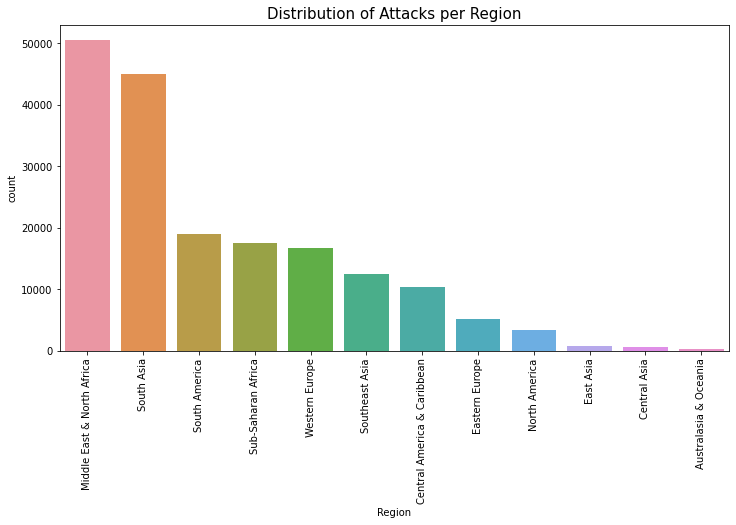

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot('Region',data=df1,order=df1['Region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Distribution of Attacks per Region', size=15)
plt.show()

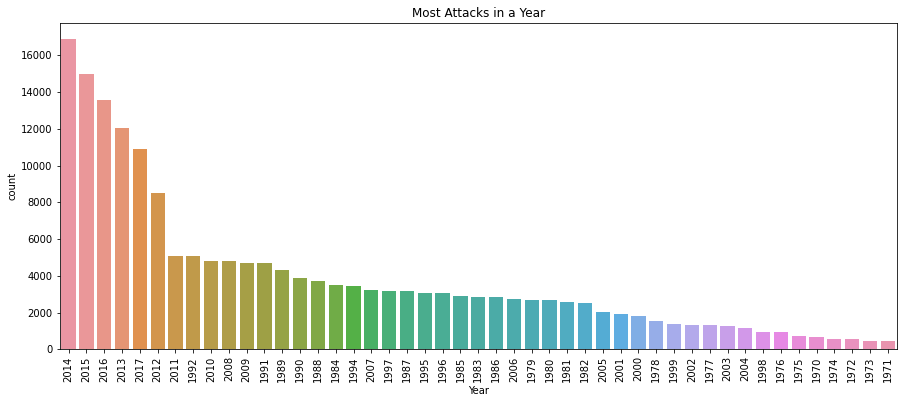

In [31]:
plt.subplots(figsize=(15,6))
sns.countplot("Year",data=df1,order=df1['Year'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Most Attacks in a Year")
plt.show()

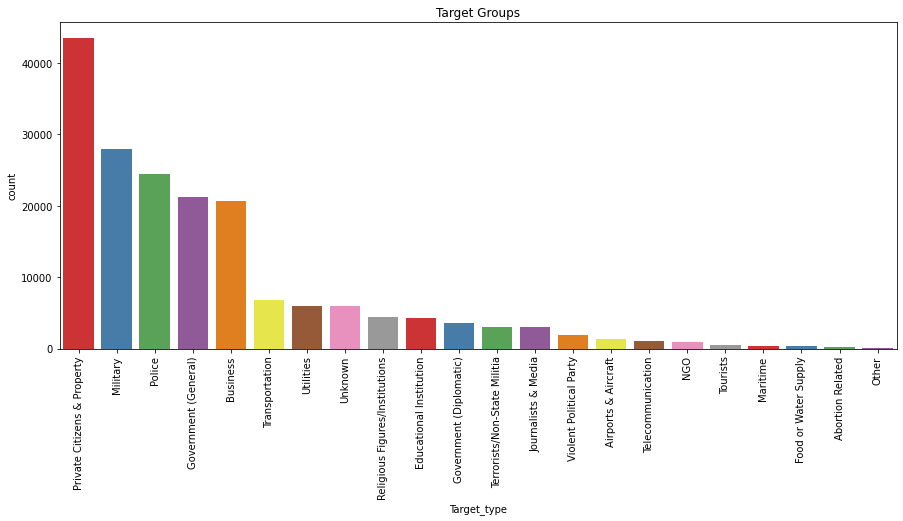

In [86]:
plt.subplots(figsize=(15,6))
sns.countplot(df1['Target_type'],palette='Set1',order=df1['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Target Groups')
plt.show()

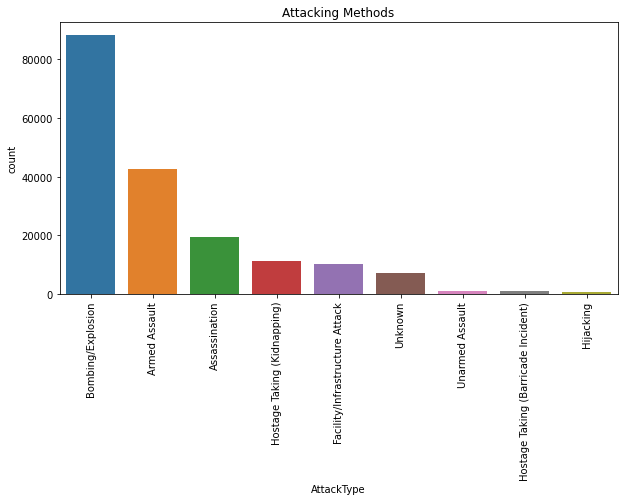

In [22]:
plt.subplots(figsize=(10,5))
sns.countplot("AttackType",data=df1,order=df1['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods')
plt.show()

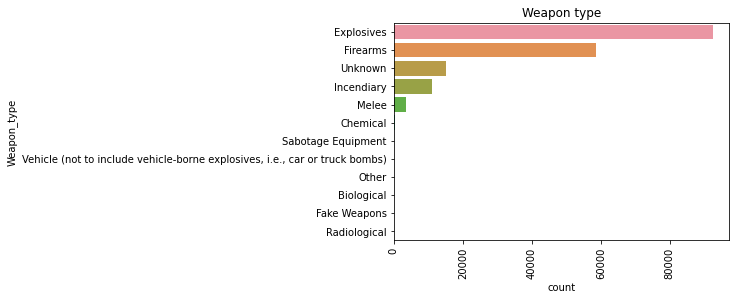

In [54]:
sns.countplot(y="Weapon_type",data=df1,order=df1['Weapon_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Weapon type")
plt.show()

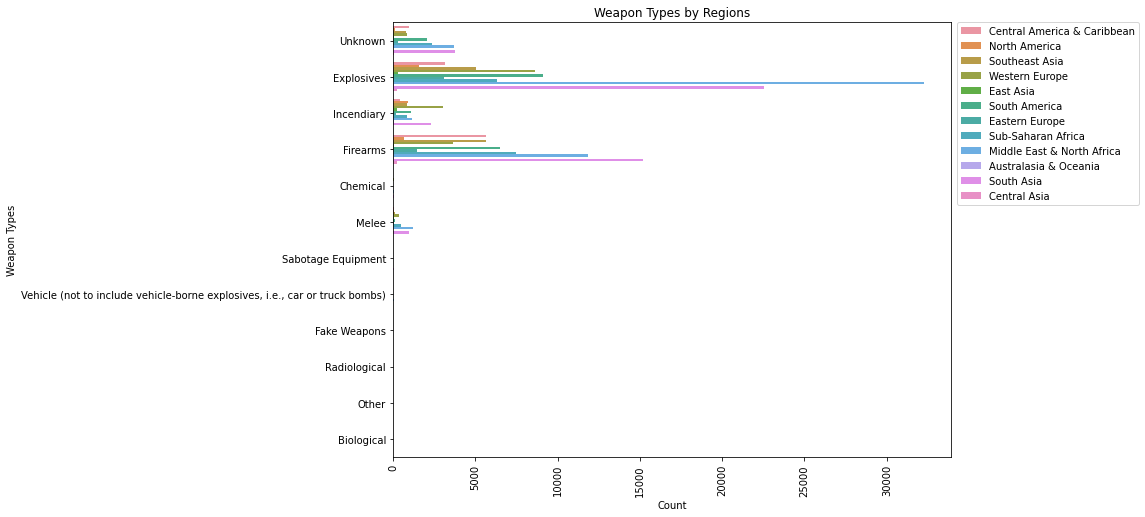

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(y="Weapon_type", hue="Region", data=df1)
plt.title("Weapon Types by Regions")
plt.ylabel("Weapon Types")
plt.xlabel("Count")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.tight_layout()
plt.show()

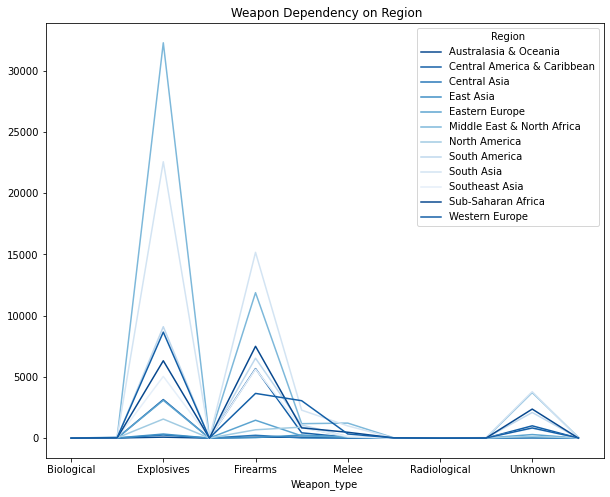

In [46]:

lm= pd.crosstab(df1["Weapon_type"],df1["Region"])
lm.plot(color=sns.color_palette('Blues_r',10))
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title(" Weapon Dependency on Region")
plt.show()

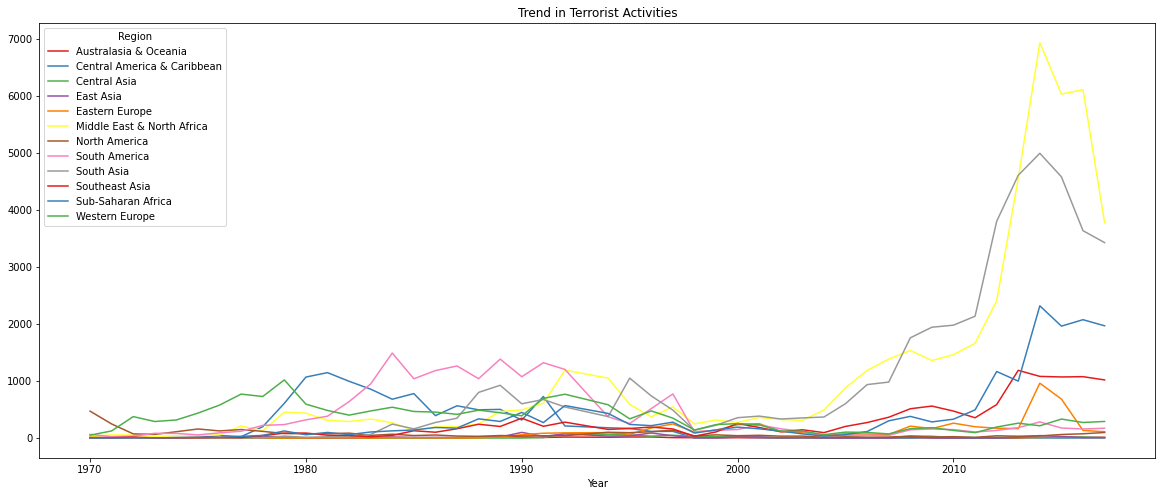

In [57]:

terror_region=pd.crosstab(df1.Year,df1.Region)
terror_region.plot(color=sns.color_palette('Set1',12))
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.title("Trend in Terrorist Activities")
plt.show()

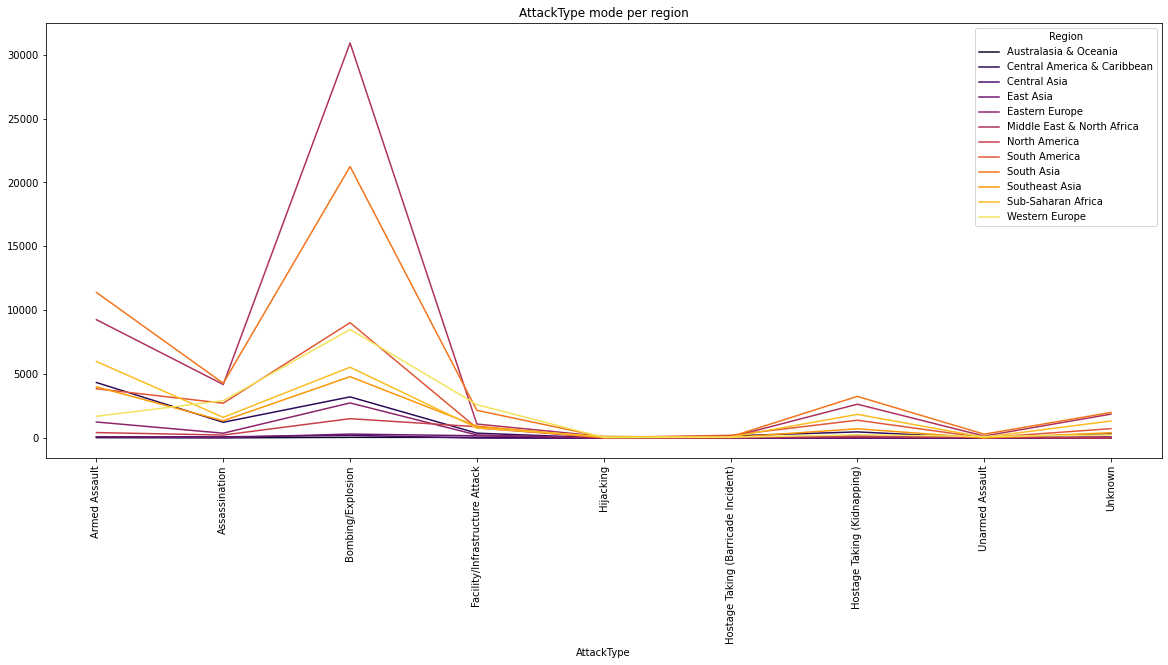

In [58]:
attack_region=pd.crosstab(df1.AttackType,df1.Region)
attack_region.plot(color=sns.color_palette('inferno',12))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.title("AttackType mode per region")
plt.show()

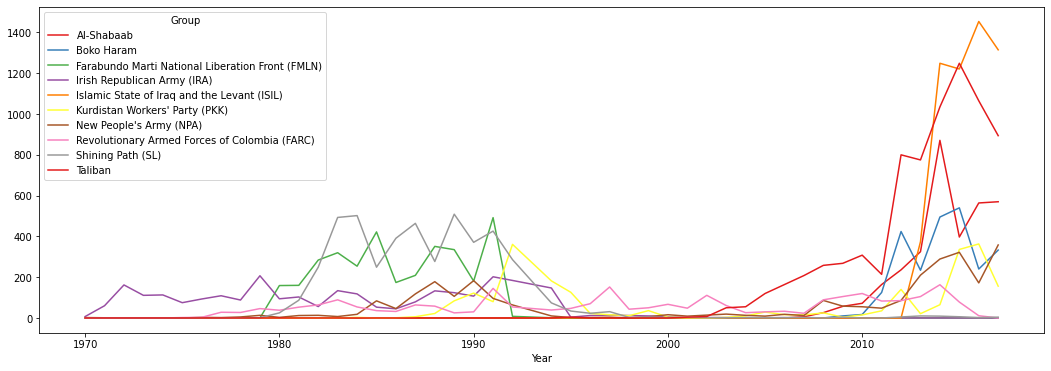

In [116]:
top_groups10=df1[df1['Group'].isin(df1['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Set1',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

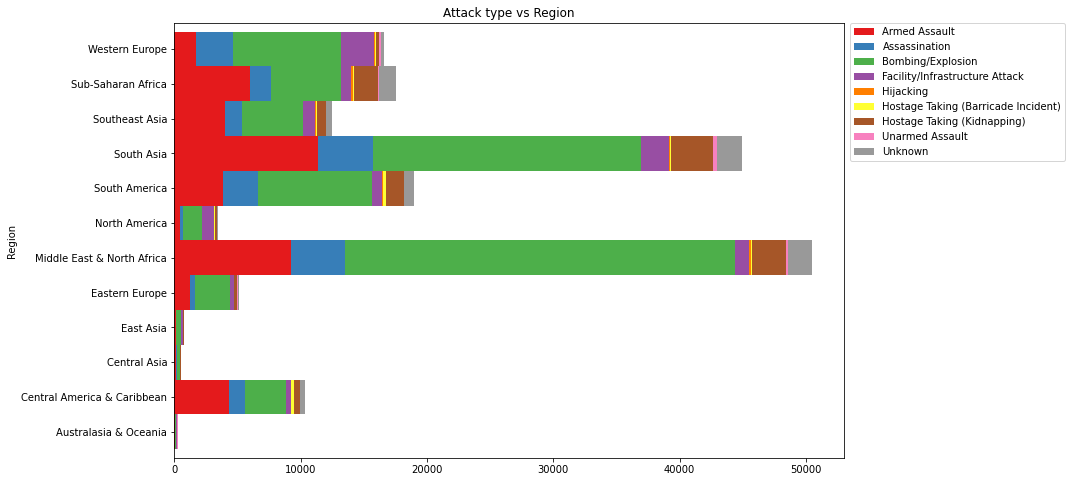

In [110]:
pd.crosstab(df1.Region,df1.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('Set1',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Attack type vs Region")
plt.show()

In [106]:
#....................Top 20 Terrorist Group..........................
df1.Group.value_counts()[1:20].index.tolist()

['Taliban',
 'Islamic State of Iraq and the Levant (ISIL)',
 'Shining Path (SL)',
 'Farabundo Marti National Liberation Front (FMLN)',
 'Al-Shabaab',
 "New People's Army (NPA)",
 'Irish Republican Army (IRA)',
 'Revolutionary Armed Forces of Colombia (FARC)',
 'Boko Haram',
 "Kurdistan Workers' Party (PKK)",
 'Basque Fatherland and Freedom (ETA)',
 'Communist Party of India - Maoist (CPI-Maoist)',
 'Maoists',
 'Liberation Tigers of Tamil Eelam (LTTE)',
 'National Liberation Army of Colombia (ELN)',
 'Tehrik-i-Taliban Pakistan (TTP)',
 'Palestinians',
 'Houthi extremists (Ansar Allah)',
 'Al-Qaida in the Arabian Peninsula (AQAP)']

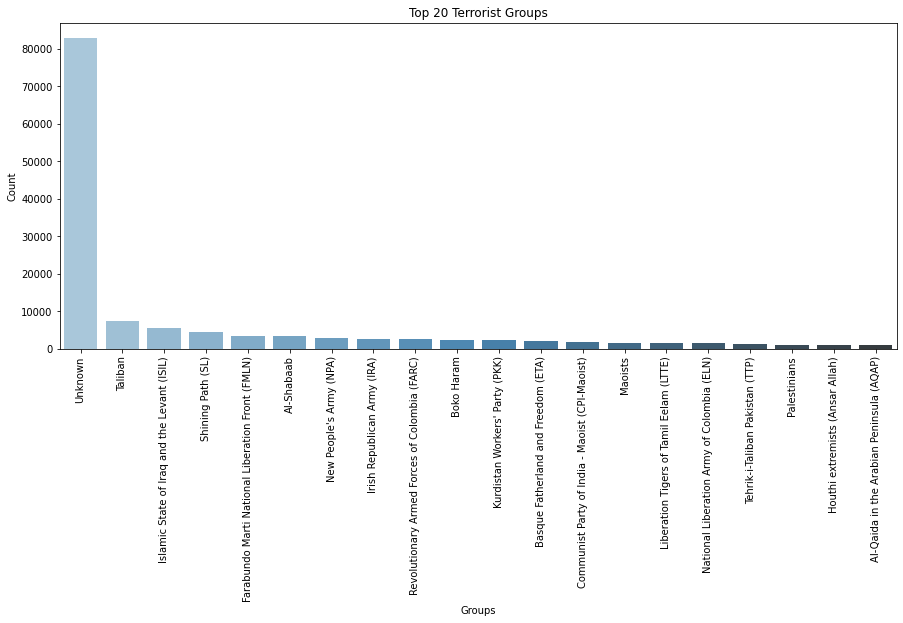

In [17]:
plt.subplots(figsize=(15,6))
sns.barplot(df1['Group'].value_counts()[:20].index,df1['Group'].value_counts()[:20].values,palette='Blues_d')
plt.title('Top 20 Terrorist Groups')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

Most of the responsible behind the attacks are unknown.The second highest is Taliban Group.

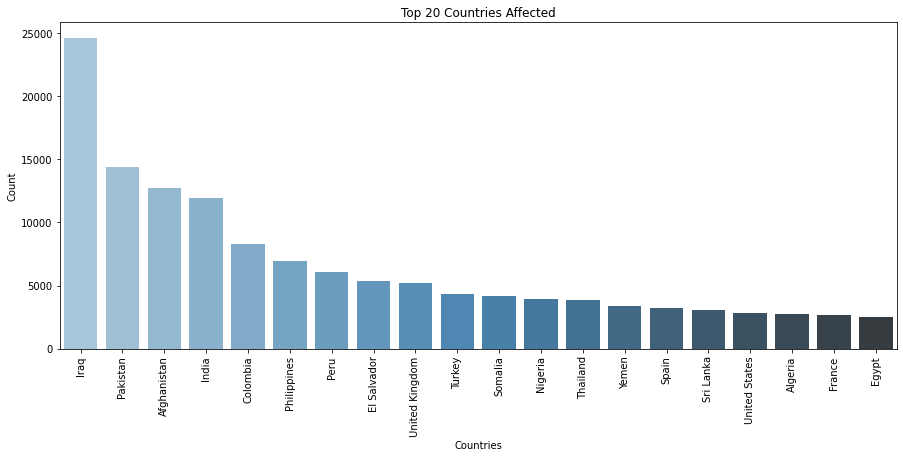

In [18]:
plt.subplots(figsize=(15,6))
sns.barplot(df1['Country'].value_counts()[:20].index,df1['Country'].value_counts()[:20].values,palette='Blues_d')
plt.title('Top 20 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

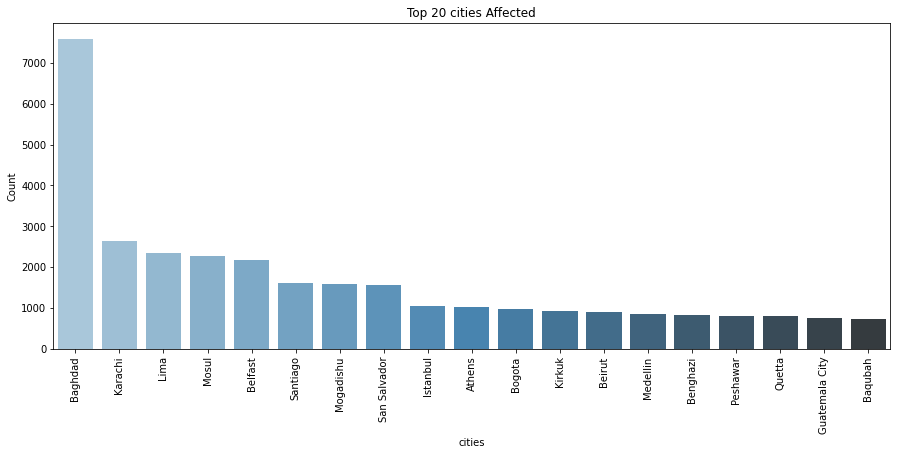

In [21]:
plt.subplots(figsize=(15,6))
sns.barplot(df1['city'].value_counts()[1:20].index,df1['city'].value_counts()[1:20].values,palette='Blues_d')
plt.title('Top 20 cities Affected')
plt.xlabel('cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

<AxesSubplot:>

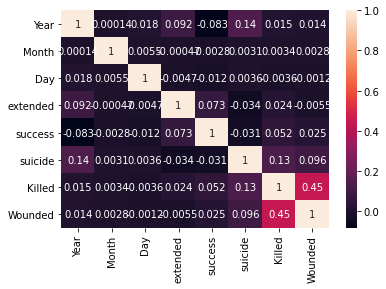

In [33]:
correlation=df1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

Text(0.5, 1.0, 'Killed Per Year')

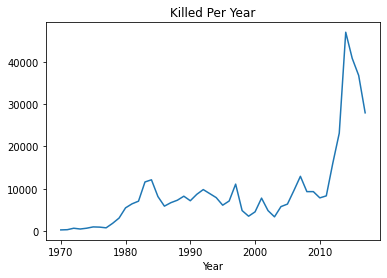

In [19]:
killed_by_year=df1.groupby('Year')['Killed'].sum()
killed_by_year.plot()
plt.title("Killed Per Year")

,Region,Killed
0,Australasia & Oceania,164.419634
1,Central America & Caribbean,34288.398277
2,Central Asia,1009.613089
3,East Asia,1245.727620
4,Eastern Europe,7813.943202
5,Middle East & North Africa,143104.637935
6,North America,5139.504324
7,South America,32867.271283
8,South Asia,103570.866144
9,Southeast Asia,16300.303154


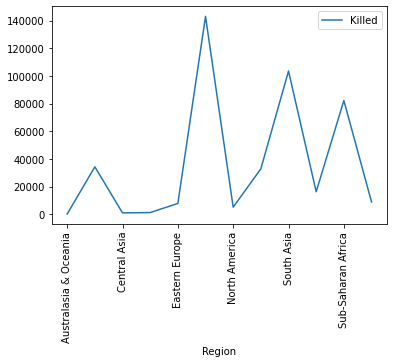

In [82]:
#how many peoople died and where.
dead_by_region= df1.groupby(by='Region').sum()
a7 = dead_by_region ['Killed']
a7.columns = ['sum']
a7 = a7.reset_index()
display(a7)   
a7.plot(x="Region")
plt.xticks(rotation=90)
plt.show()


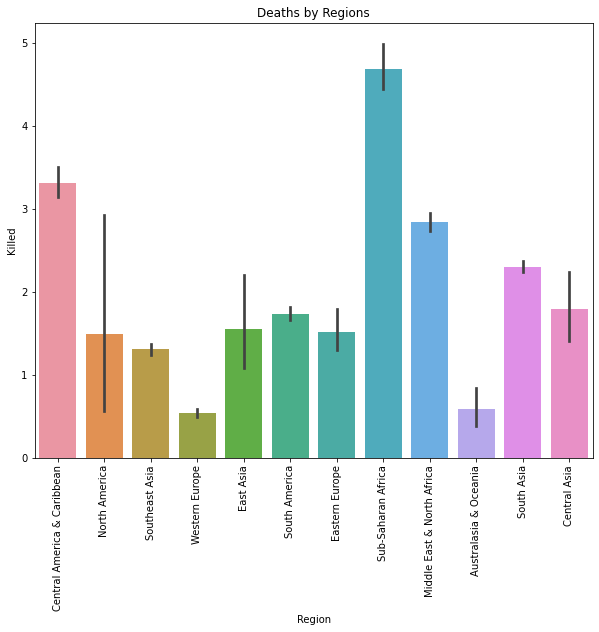

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Region', y = 'Killed', data = df1)
plt.xticks(rotation = 90)
plt.title('Deaths by Regions')
plt.show()

<AxesSubplot:xlabel='success', ylabel='count'>

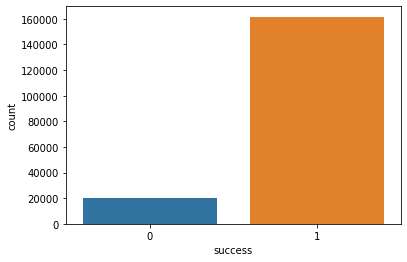

In [92]:
sns.countplot("success",data=df1)

 majority attack was success

<AxesSubplot:xlabel='suicide', ylabel='count'>

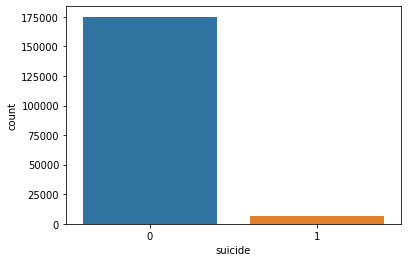

In [93]:
sns.countplot("suicide",data=df1)


small amounts of attacks were suicide attacks

<AxesSubplot:xlabel='extended', ylabel='count'>

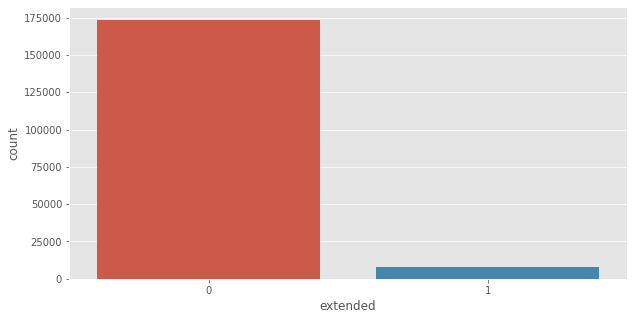

In [31]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot("extended",data=df)

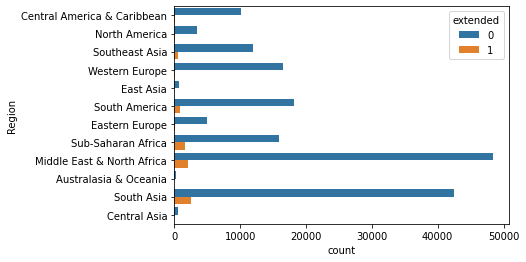

In [64]:
sns.countplot(y="Region",hue="extended",data=df1)
plt.show()

Very few of attacks were extended for 24 hours

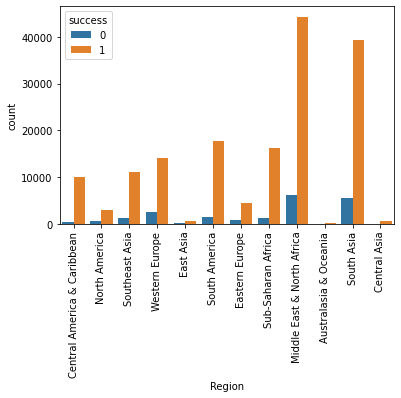

In [63]:
sns.countplot(x='Region',data=df1,hue='success')
plt.xticks(rotation=90)
plt.show()

The success rate of attacks in Middle EAst & North AMerica was very high followed by South Asia and south America

### Final Observation:
* Private Citizens and propert, and Military are the most affected target types.
* Bombing/Explosion followed by Armed Assault are the most frequent attack type. The number of attacks employing Bombing/Explosion show steady rise over the years.
* Concurrently Exlposives/Bombs are the most favoured weapon type by the different terrorist groups.
* Taliban, Shining Path (SL) and ISIL are the most notorious terrorist groups responsible for most number of attacks and most of number of people killed.
* Taliban conducted first attack in 1975 and ISIL in 2013. The number of attacks by these two groups have been on a rise since then. On the contrary there has been a sharp decline in the number of attacks by SL.
* Baghdad has suffered 7K attacks which is the highest among all the cities.
* Karachi and Lima have collectively suffered about 5K attacks.
* Iraq is followed by Pakistan and Afghanistan who had 13K and 11K attacks respectively.
* The success rate of attacks in Middle EAst & North AMerica was very high followed by South Asia and south America

### Thank You